# Roles Classifier Alternative: Support Vector Machines

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## Testing Several Files

In [27]:
file_size = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 645]
accuracy = []

for i in file_size:
    file_name = f'output/balanced_{i}.csv'
    roles = pd.read_csv(f'../{file_name}')
    mapping = {'Student': 0, 'Co-Facilitator': 1, 'Facilitator': 2}
    roles['Role'] = roles['Role'].apply(lambda x: mapping[x])

    X = roles['Text']
    y = roles['Role']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

    # 'hinge' gives SVM
    # penalty is L2, for SVM
    svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)
    svm.n_iter = 5
    svm_classifier = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svm),
    ])

    # Fitting our train data to the pipeline
    svm_classifier.fit(X_train, y_train)
    predicted = svm_classifier.predict(X_valid)

    accuracy_partial = np.mean(predicted == y_valid)
    print(f'Accuracy for file_size {i}: %.3f' % accuracy_partial)
    accuracy.append(accuracy_partial)

Accuracy for file_size 150: 0.567
Accuracy for file_size 200: 0.525
Accuracy for file_size 250: 0.560
Accuracy for file_size 300: 0.600
Accuracy for file_size 350: 0.529
Accuracy for file_size 400: 0.600
Accuracy for file_size 450: 0.544
Accuracy for file_size 500: 0.550
Accuracy for file_size 550: 0.555
Accuracy for file_size 600: 0.567
Accuracy for file_size 645: 0.636


## Graphical Performance Analysis

In the following plots we can see the how the model behaves when it is trained with different amounts of data.

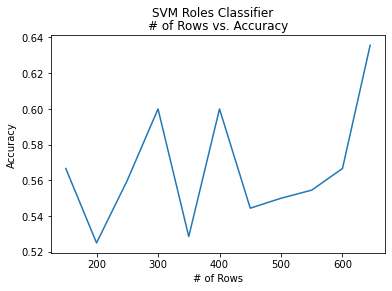

In [28]:
%matplotlib inline

plt.plot(file_size, accuracy)
plt.title('# of Rows vs. Accuracy')
plt.suptitle('SVM Roles Classifier')
plt.xlabel('# of Rows')
plt.ylabel('Accuracy')
plt.show()

In [29]:
print(f'Mean Accuracy: {np.mean(accuracy)}')


Mean Accuracy: 0.566504870511213


## Conclusions

- The model doesn't show a good performance with the datasets, and we can see that the behavior is random, from which we can conclude that SVM was not able to learn anything from the datasets. Even if we consider that the Mean Accuracy is around 0.56, the variance between the results is not a good indicator.